In [35]:
import numpy as np 
import pandas as pd

%load_ext autoreload
%autoreload 2
from simulation import Simulation

import pickle

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
all_students_features_sp22 = pd.read_csv('../data/data_sp22/all_students_features_T_e=7_finalized_nontruncated_sp22.csv', index_col = 0)

sim = Simulation(student_features=all_students_features_sp22)

C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
g:\Data_Peter\classroom_transmission\simulation\simulation.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['day_idx'] = self.df['day_idx'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%d').toordinal() - baseline_date)
g:\Data_Peter\classroom_transmission\simulation\simulation.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [20]:
from collections import defaultdict

In [30]:
TRUE_COEF = 0.27

In [158]:
# sampling class positivity from a distributioun with constant mean over time

logit_res = defaultdict(list)
cox_res = defaultdict(list)
classpos_time_corr = defaultdict(list)

for shape_val in [0.5, 1.0, 1.5, 2]:
    print("shape value", shape_val)
    for batch in range(50):
        sim_data = pd.read_csv(
            # f"../data/simulation/SampledFeature=cp_OutcomeGenenerator=cox_shape={shape_val}_batch={batch}.csv",
            # f"../data/simulation/SampledFeature=cp_OutcomeGenenerator=cox_scale=0.001_shape={shape_val}_batch={batch}.csv",
            f"../data/simulation/SampledFeature=cp_sampling=aggregate_OutcomeGenenerator=cox_scale=0.001_shape={shape_val}_batch={batch}.csv",
            index_col=0
        )

        ctv = sim.fit_cox(sim_data)
        ctv_lower, ctv_upper = ctv.confidence_intervals_.values[0]
        cox_res[shape_val].append(
            {"coef": ctv.params_["class_positivity"], 
            "p-value": ctv._compute_p_values()[0],
            "coverage": TRUE_COEF >= ctv_lower and TRUE_COEF <= ctv_upper}
        )

        sim_data["week_idx"] = sim_data["day_idx"] // 7
        logit = sim.fit_logistic(sim_data)
        logit_lower, logit_upper = logit.conf_int().loc["class_positivity"].values
        logit_res[shape_val].append(
            {"coef": logit._results.params[-2],
            "p-value": logit.pvalues["class_positivity"],
            "coverage": TRUE_COEF >= logit_lower and TRUE_COEF <= logit_upper}
        )

        corr = sim_data.corr()
        classpos_time_corr[shape_val].append(corr['class_positivity']['day_idx'])

        print(
            f"batch {batch}, cox coeff={ctv.params_['class_positivity']:.2f}, p={ctv._compute_p_values()[0]:.2f}, logit coeff={logit._results.params[-2]:.2f}, p={logit.pvalues['class_positivity']:.2f}; "
            f"logit campus_pos coeff={logit._results.params[-1]:.2f}, p={logit.pvalues['campus_positivity']:.2f}; ")
        # print(
        #     f"class_pos and time correlation={corr['class_positivity']['day_idx']:.2f}; "
        #     f"class_pos and campus_pos correlation={corr['class_positivity']['campus_positivity']:.2f}; "
        # )

        setting = "SampledFeature=cp_sampling=aggregate_OutcomeGenenerator=cox_scale=0.001"
        with open ("logit_res_" + setting + ".pkl", "wb") as f:
            pickle.dump(logit_res, f)
        with open ("cox_res_" + setting + ".pkl", "wb") as f:
            pickle.dump(cox_res, f)
        with open("classpos_time_corr" + setting + ".pkl", "wb") as f:
            pickle.dump(classpos_time_corr, f)
            


shape value 0.5


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 0, cox coeff=-2.34, p=0.39, logit coeff=-2.34, p=0.34; logit campus_pos coeff=0.01, p=0.10; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.369. This may imply non-uni

batch 1, cox coeff=0.82, p=0.79, logit coeff=0.82, p=0.77; logit campus_pos coeff=-0.01, p=0.07; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.370. This may imply non-uni

batch 2, cox coeff=-4.90, p=0.09, logit coeff=-4.90, p=0.07; logit campus_pos coeff=-0.02, p=0.00; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 3, cox coeff=-2.86, p=0.33, logit coeff=-2.86, p=0.38; logit campus_pos coeff=-0.01, p=0.14; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply

batch 4, cox coeff=-0.75, p=0.77, logit coeff=-0.75, p=0.77; logit campus_pos coeff=-0.00, p=0.21; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.362. This may imply non-uni

batch 5, cox coeff=-0.36, p=0.87, logit coeff=-0.36, p=0.87; logit campus_pos coeff=-0.00, p=0.90; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.204. This may imply non-uni

batch 6, cox coeff=0.15, p=0.95, logit coeff=0.15, p=0.95; logit campus_pos coeff=0.00, p=0.27; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 7, cox coeff=-3.44, p=0.19, logit coeff=-3.44, p=0.16; logit campus_pos coeff=-0.01, p=0.05; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.205. This may imply non-uni

batch 8, cox coeff=-4.48, p=0.14, logit coeff=-4.49, p=0.10; logit campus_pos coeff=-0.01, p=0.06; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.261. This may imply non-uni

batch 9, cox coeff=-3.50, p=0.16, logit coeff=-3.51, p=0.18; logit campus_pos coeff=-0.00, p=0.28; 
batch 10, cox coeff=4.09, p=0.10, logit coeff=4.10, p=0.06; logit campus_pos coeff=-0.00, p=0.32; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 11, cox coeff=2.10, p=0.38, logit coeff=2.10, p=0.36; logit campus_pos coeff=-0.00, p=0.29; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.164. This may imply non-uni

batch 12, cox coeff=-2.73, p=0.38, logit coeff=-2.73, p=0.40; logit campus_pos coeff=-0.01, p=0.01; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.270. This may imply non-uni

batch 13, cox coeff=0.17, p=0.95, logit coeff=0.17, p=0.96; logit campus_pos coeff=-0.01, p=0.04; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.352. This may imply non-uni

batch 14, cox coeff=-4.52, p=0.12, logit coeff=-4.53, p=0.11; logit campus_pos coeff=-0.01, p=0.01; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.164. This may imply non-uni

batch 15, cox coeff=0.18, p=0.95, logit coeff=0.17, p=0.95; logit campus_pos coeff=-0.01, p=0.24; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 16, cox coeff=-0.15, p=0.95, logit coeff=-0.15, p=0.95; logit campus_pos coeff=-0.00, p=0.72; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply

batch 17, cox coeff=1.40, p=0.58, logit coeff=1.40, p=0.56; logit campus_pos coeff=-0.00, p=0.27; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.204. This may imply non-uni

batch 18, cox coeff=0.84, p=0.74, logit coeff=0.84, p=0.75; logit campus_pos coeff=-0.01, p=0.03; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 19, cox coeff=3.85, p=0.10, logit coeff=3.85, p=0.10; logit campus_pos coeff=-0.01, p=0.02; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.166. This may imply non-uni

batch 20, cox coeff=3.52, p=0.20, logit coeff=3.52, p=0.23; logit campus_pos coeff=-0.01, p=0.01; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.166. This may imply non-uni

batch 21, cox coeff=-1.71, p=0.59, logit coeff=-1.71, p=0.57; logit campus_pos coeff=-0.00, p=0.72; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 22, cox coeff=1.34, p=0.57, logit coeff=1.34, p=0.55; logit campus_pos coeff=-0.00, p=0.36; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.243. This may imply non-uni

batch 23, cox coeff=0.06, p=0.98, logit coeff=0.06, p=0.98; logit campus_pos coeff=-0.00, p=0.96; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 24, cox coeff=-1.07, p=0.70, logit coeff=-1.07, p=0.71; logit campus_pos coeff=-0.01, p=0.05; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply non-uni

batch 25, cox coeff=-0.89, p=0.75, logit coeff=-0.89, p=0.76; logit campus_pos coeff=-0.01, p=0.20; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 26, cox coeff=2.08, p=0.41, logit coeff=2.08, p=0.41; logit campus_pos coeff=-0.00, p=0.51; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply

batch 27, cox coeff=-4.20, p=0.15, logit coeff=-4.21, p=0.13; logit campus_pos coeff=-0.00, p=0.30; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 28, cox coeff=0.07, p=0.98, logit coeff=0.07, p=0.97; logit campus_pos coeff=-0.00, p=0.26; 
batch 29, cox coeff=1.32, p=0.58, logit coeff=1.32, p=0.51; logit campus_pos coeff=-0.01, p=0.18; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 30, cox coeff=-0.22, p=0.93, logit coeff=-0.22, p=0.93; logit campus_pos coeff=-0.00, p=0.38; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 31, cox coeff=-0.58, p=0.85, logit coeff=-0.59, p=0.88; logit campus_pos coeff=0.00, p=0.27; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 32, cox coeff=-1.12, p=0.69, logit coeff=-1.12, p=0.67; logit campus_pos coeff=-0.01, p=0.00; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.204. This may imply non-uni

batch 33, cox coeff=-1.10, p=0.71, logit coeff=-1.10, p=0.71; logit campus_pos coeff=-0.00, p=0.95; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 34, cox coeff=2.26, p=0.36, logit coeff=2.26, p=0.34; logit campus_pos coeff=-0.01, p=0.18; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.259. This may imply non-uni

batch 35, cox coeff=1.56, p=0.49, logit coeff=1.57, p=0.45; logit campus_pos coeff=-0.00, p=0.17; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply non-uni

batch 36, cox coeff=1.48, p=0.60, logit coeff=1.48, p=0.63; logit campus_pos coeff=0.00, p=0.56; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.292. This may imply non-uni

batch 37, cox coeff=3.62, p=0.19, logit coeff=3.62, p=0.20; logit campus_pos coeff=-0.01, p=0.10; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.369. This may imply non-uni

batch 38, cox coeff=0.33, p=0.91, logit coeff=0.33, p=0.92; logit campus_pos coeff=-0.00, p=0.23; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.261. This may imply non-uni

batch 39, cox coeff=4.31, p=0.06, logit coeff=4.31, p=0.05; logit campus_pos coeff=-0.01, p=0.00; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.352. This may imply non-uni

batch 40, cox coeff=-0.61, p=0.82, logit coeff=-0.61, p=0.82; logit campus_pos coeff=-0.01, p=0.14; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.320. This may imply non-uni

batch 41, cox coeff=3.58, p=0.24, logit coeff=3.58, p=0.30; logit campus_pos coeff=-0.00, p=0.52; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.166. This may imply non-uni

batch 42, cox coeff=1.55, p=0.57, logit coeff=1.55, p=0.53; logit campus_pos coeff=-0.01, p=0.24; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 43, cox coeff=-2.99, p=0.22, logit coeff=-2.99, p=0.22; logit campus_pos coeff=0.00, p=0.72; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 44, cox coeff=3.39, p=0.17, logit coeff=3.39, p=0.17; logit campus_pos coeff=-0.00, p=0.31; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.166. This may imply non-uni

batch 45, cox coeff=1.84, p=0.49, logit coeff=1.84, p=0.46; logit campus_pos coeff=-0.00, p=0.20; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply

batch 46, cox coeff=-3.72, p=0.20, logit coeff=-3.72, p=0.23; logit campus_pos coeff=-0.00, p=0.34; 
batch 47, cox coeff=6.99, p=0.00, logit coeff=6.99, p=0.00; logit campus_pos coeff=-0.01, p=0.05; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply

batch 48, cox coeff=-0.42, p=0.85, logit coeff=-0.42, p=0.85; logit campus_pos coeff=-0.00, p=0.29; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.238. This may imply non-uni

batch 49, cox coeff=1.28, p=0.58, logit coeff=1.28, p=0.56; logit campus_pos coeff=-0.00, p=0.35; 
shape value 1.0
batch 0, cox coeff=-0.14, p=0.91, logit coeff=-0.14, p=0.90; logit campus_pos coeff=0.00, p=0.44; 
batch 1, cox coeff=3.16, p=0.01, logit coeff=3.17, p=0.01; logit campus_pos coeff=-0.00, p=0.25; 
batch 2, cox coeff=-0.28, p=0.82, logit coeff=-0.28, p=0.80; logit campus_pos coeff=-0.00, p=0.21; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.168. This may imply non-uni

batch 3, cox coeff=1.43, p=0.23, logit coeff=1.43, p=0.23; logit campus_pos coeff=-0.00, p=0.83; 
batch 4, cox coeff=2.41, p=0.04, logit coeff=2.41, p=0.04; logit campus_pos coeff=0.00, p=0.44; 
batch 5, cox coeff=1.33, p=0.28, logit coeff=1.34, p=0.26; logit campus_pos coeff=0.00, p=0.82; 
batch 6, cox coeff=0.35, p=0.78, logit coeff=0.35, p=0.79; logit campus_pos coeff=0.00, p=0.74; 
batch 7, cox coeff=-2.04, p=0.12, logit coeff=-2.04, p=0.12; logit campus_pos coeff=0.00, p=0.33; 
batch 8, cox coeff=0.93, p=0.47, logit coeff=0.94, p=0.48; logit campus_pos coeff=0.00, p=0.91; 
batch 9, cox coeff=-0.10, p=0.93, logit coeff=-0.10, p=0.93; logit campus_pos coeff=-0.00, p=0.22; 
batch 10, cox coeff=-2.39, p=0.09, logit coeff=-2.39, p=0.10; logit campus_pos coeff=0.00, p=0.45; 
batch 11, cox coeff=1.98, p=0.10, logit coeff=1.98, p=0.11; logit campus_pos coeff=0.00, p=0.65; 
batch 12, cox coeff=-1.40, p=0.27, logit coeff=-1.40, p=0.24; logit campus_pos coeff=0.00, p=0.25; 
batch 13, cox coe

C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.168. This may imply non-uni

batch 24, cox coeff=1.82, p=0.13, logit coeff=1.82, p=0.13; logit campus_pos coeff=0.00, p=0.48; 
batch 25, cox coeff=1.15, p=0.34, logit coeff=1.15, p=0.33; logit campus_pos coeff=-0.00, p=0.68; 
batch 26, cox coeff=-1.58, p=0.25, logit coeff=-1.58, p=0.27; logit campus_pos coeff=-0.00, p=0.68; 
batch 27, cox coeff=-1.85, p=0.16, logit coeff=-1.85, p=0.13; logit campus_pos coeff=0.00, p=0.04; 
batch 28, cox coeff=1.31, p=0.27, logit coeff=1.31, p=0.26; logit campus_pos coeff=0.00, p=0.20; 
batch 29, cox coeff=1.54, p=0.19, logit coeff=1.55, p=0.18; logit campus_pos coeff=-0.00, p=0.86; 
batch 30, cox coeff=0.52, p=0.68, logit coeff=0.52, p=0.71; logit campus_pos coeff=0.00, p=0.70; 
batch 31, cox coeff=0.94, p=0.47, logit coeff=0.94, p=0.47; logit campus_pos coeff=0.00, p=0.61; 
batch 32, cox coeff=0.29, p=0.82, logit coeff=0.29, p=0.82; logit campus_pos coeff=-0.00, p=0.69; 
batch 33, cox coeff=-0.03, p=0.98, logit coeff=-0.03, p=0.98; logit campus_pos coeff=0.00, p=0.65; 
batch 34, 

In [159]:
# sampling class positivity from a distribution with a different mean every day

logit_res = defaultdict(list)
cox_res = defaultdict(list)
classpos_time_corr = defaultdict(list)

for shape_val in [0.5, 1.0, 1.5, 2]:
    print("shape value", shape_val)
    for batch in range(50):
        sim_data = pd.read_csv(
            # f"../data/simulation/SampledFeature=cp_OutcomeGenenerator=cox_shape={shape_val}_batch={batch}.csv",
            f"../data/simulation/SampledFeature=cp_OutcomeGenenerator=cox_scale=0.001_shape={shape_val}_batch={batch}.csv",
            # f"../data/simulation/SampledFeature=cp_sampling=aggregate_OutcomeGenenerator=cox_scale=0.001_shape={shape_val}_batch={batch}.csv",
            index_col=0
        )

        ctv = sim.fit_cox(sim_data)
        ctv_lower, ctv_upper = ctv.confidence_intervals_.values[0]
        cox_res[shape_val].append(
            {"coef": ctv.params_["class_positivity"], 
            "p-value": ctv._compute_p_values()[0],
            "coverage": TRUE_COEF >= ctv_lower and TRUE_COEF <= ctv_upper}
        )

        sim_data["week_idx"] = sim_data["day_idx"] // 7
        logit = sim.fit_logistic(sim_data)
        logit_lower, logit_upper = logit.conf_int().loc["class_positivity"].values
        logit_res[shape_val].append(
            {"coef": logit._results.params[-2],
            "p-value": logit.pvalues["class_positivity"],
            "coverage": TRUE_COEF >= logit_lower and TRUE_COEF <= logit_upper}
        )

        corr = sim_data.corr()
        classpos_time_corr[shape_val].append(corr['class_positivity']['day_idx'])

        print(
            f"batch {batch}, cox coeff={ctv.params_['class_positivity']:.2f}, p={ctv._compute_p_values()[0]:.2f}, logit coeff={logit._results.params[-2]:.2f}, p={logit.pvalues['class_positivity']:.2f}; "
            f"logit campus_pos coeff={logit._results.params[-1]:.2f}, p={logit.pvalues['campus_positivity']:.2f}; ")

        setting = "SampledFeature=cp_sampling=byday_OutcomeGenenerator=cox_scale=0.001"
        with open ("logit_res_" + setting + ".pkl", "wb") as f:
            pickle.dump(logit_res, f)
        with open ("cox_res_" + setting + ".pkl", "wb") as f:
            pickle.dump(cox_res, f)
        with open("classpos_time_corr" + setting + ".pkl", "wb") as f:
            pickle.dump(classpos_time_corr, f)
            


shape value 0.5
batch 0, cox coeff=2.64, p=0.31, logit coeff=2.56, p=0.27; logit campus_pos coeff=-0.00, p=0.49; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.313. This may imply non-uni

batch 1, cox coeff=2.10, p=0.53, logit coeff=0.80, p=0.77; logit campus_pos coeff=-0.00, p=0.47; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 2, cox coeff=1.06, p=0.70, logit coeff=0.36, p=0.88; logit campus_pos coeff=0.00, p=0.81; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.164. This may imply non-uni

batch 3, cox coeff=3.40, p=0.25, logit coeff=2.37, p=0.43; logit campus_pos coeff=0.00, p=0.95; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 4, cox coeff=5.64, p=0.06, logit coeff=4.36, p=0.12; logit campus_pos coeff=-0.00, p=0.41; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 5, cox coeff=-8.02, p=0.06, logit coeff=-7.95, p=0.02; logit campus_pos coeff=-0.01, p=0.06; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 6, cox coeff=-2.96, p=0.42, logit coeff=-2.79, p=0.26; logit campus_pos coeff=0.00, p=0.74; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.311. This may imply non-uni

batch 7, cox coeff=0.43, p=0.90, logit coeff=-0.40, p=0.89; logit campus_pos coeff=-0.00, p=0.51; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.311. This may imply non-uni

batch 8, cox coeff=-2.64, p=0.50, logit coeff=-2.95, p=0.53; logit campus_pos coeff=0.00, p=0.82; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 9, cox coeff=2.04, p=0.56, logit coeff=0.74, p=0.81; logit campus_pos coeff=-0.01, p=0.04; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.166. This may imply non-uni

batch 10, cox coeff=0.54, p=0.86, logit coeff=-2.03, p=0.30; logit campus_pos coeff=-0.01, p=0.13; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 11, cox coeff=0.32, p=0.91, logit coeff=-0.70, p=0.85; logit campus_pos coeff=-0.01, p=0.01; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.164. This may imply non-uni

batch 12, cox coeff=1.29, p=0.71, logit coeff=0.24, p=0.93; logit campus_pos coeff=-0.00, p=0.52; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 13, cox coeff=-0.33, p=0.92, logit coeff=-0.83, p=0.80; logit campus_pos coeff=0.00, p=0.44; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply

batch 14, cox coeff=1.30, p=0.72, logit coeff=-1.49, p=0.64; logit campus_pos coeff=-0.00, p=0.37; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 15, cox coeff=3.84, p=0.23, logit coeff=2.44, p=0.42; logit campus_pos coeff=-0.00, p=0.72; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.269. This may imply

batch 16, cox coeff=-3.77, p=0.39, logit coeff=-5.17, p=0.23; logit campus_pos coeff=-0.00, p=0.45; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.268. This may imply non-uni

batch 17, cox coeff=-6.11, p=0.15, logit coeff=-6.36, p=0.18; logit campus_pos coeff=-0.01, p=0.14; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.331. This may imply non-uni

batch 18, cox coeff=2.01, p=0.52, logit coeff=0.59, p=0.84; logit campus_pos coeff=-0.00, p=0.19; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.173. This may imply non-uni

batch 19, cox coeff=0.76, p=0.80, logit coeff=0.79, p=0.79; logit campus_pos coeff=-0.00, p=0.54; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 20, cox coeff=-6.47, p=0.09, logit coeff=-7.21, p=0.02; logit campus_pos coeff=-0.01, p=0.13; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.243. This may imply non-uni

batch 21, cox coeff=-1.22, p=0.68, logit coeff=-1.14, p=0.63; logit campus_pos coeff=-0.01, p=0.08; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 22, cox coeff=2.89, p=0.39, logit coeff=2.57, p=0.41; logit campus_pos coeff=-0.02, p=0.00; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.164. This may imply non-uni

batch 23, cox coeff=-1.94, p=0.56, logit coeff=-3.12, p=0.40; logit campus_pos coeff=-0.00, p=0.40; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.369. This may imply non-uni

batch 24, cox coeff=-2.23, p=0.50, logit coeff=-2.31, p=0.48; logit campus_pos coeff=-0.00, p=0.69; 
batch 25, cox coeff=-0.05, p=0.99, logit coeff=-1.15, p=0.67; logit campus_pos coeff=-0.00, p=0.52; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.351. This may imply non-uni

batch 26, cox coeff=4.32, p=0.14, logit coeff=4.61, p=0.16; logit campus_pos coeff=-0.00, p=0.66; 
batch 27, cox coeff=1.71, p=0.58, logit coeff=-0.28, p=0.91; logit campus_pos coeff=-0.01, p=0.02; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 28, cox coeff=6.15, p=0.01, logit coeff=4.50, p=0.05; logit campus_pos coeff=-0.01, p=0.01; 
batch 29, cox coeff=0.02, p=0.99, logit coeff=-0.93, p=0.72; logit campus_pos coeff=0.00, p=0.96; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.173. This may imply non-uni

batch 30, cox coeff=1.61, p=0.56, logit coeff=-0.45, p=0.86; logit campus_pos coeff=0.00, p=0.84; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GR have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GR'].var())
>>> print(df.loc[~events, 'academic_career_GR'].var())

A very low variance means that the column academic_career_GR completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.308. This may imply non-uni

batch 31, cox coeff=-4.42, p=0.23, logit coeff=-4.62, p=0.24; logit campus_pos coeff=0.00, p=0.46; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.372. This may imply non-uni

batch 32, cox coeff=4.14, p=0.15, logit coeff=3.28, p=0.25; logit campus_pos coeff=-0.01, p=0.00; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.261. This may imply non-uni

batch 33, cox coeff=2.14, p=0.41, logit coeff=1.78, p=0.47; logit campus_pos coeff=-0.02, p=0.00; 
batch 34, cox coeff=-3.47, p=0.33, logit coeff=-4.22, p=0.27; logit campus_pos coeff=-0.01, p=0.05; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.171. This may imply non-uni

batch 35, cox coeff=-1.42, p=0.62, logit coeff=-1.22, p=0.68; logit campus_pos coeff=-0.00, p=0.38; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.164. This may imply non-uni

batch 36, cox coeff=-1.61, p=0.67, logit coeff=-2.66, p=0.43; logit campus_pos coeff=-0.00, p=0.97; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.309. This may imply non-uni

batch 37, cox coeff=-3.17, p=0.41, logit coeff=-4.09, p=0.26; logit campus_pos coeff=-0.00, p=0.28; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.270. This may imply non-uni

batch 38, cox coeff=4.06, p=0.22, logit coeff=3.14, p=0.38; logit campus_pos coeff=-0.01, p=0.07; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.208. This may imply

batch 39, cox coeff=0.30, p=0.93, logit coeff=-2.18, p=0.42; logit campus_pos coeff=-0.00, p=0.40; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.270. This may imply non-uni

batch 40, cox coeff=-2.67, p=0.41, logit coeff=-2.85, p=0.42; logit campus_pos coeff=0.01, p=0.02; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.164. This may imply non-uni

batch 41, cox coeff=-1.59, p=0.68, logit coeff=-2.40, p=0.54; logit campus_pos coeff=-0.01, p=0.28; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.352. This may imply non-uni

batch 42, cox coeff=-5.04, p=0.19, logit coeff=-5.19, p=0.15; logit campus_pos coeff=-0.01, p=0.07; 
batch 43, cox coeff=1.48, p=0.63, logit coeff=1.54, p=0.63; logit campus_pos coeff=-0.00, p=0.84; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_LA have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_LA'].var())
>>> print(df.loc[~events, 'academic_career_LA'].var())

A very low variance means that the column academic_career_LA completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.261. This may imply non-uni

batch 44, cox coeff=-1.98, p=0.59, logit coeff=-4.00, p=0.32; logit campus_pos coeff=-0.00, p=0.49; 
batch 45, cox coeff=5.20, p=0.05, logit coeff=5.10, p=0.01; logit campus_pos coeff=-0.00, p=0.24; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.243. This may imply non-uni

batch 46, cox coeff=2.39, p=0.37, logit coeff=1.30, p=0.65; logit campus_pos coeff=-0.01, p=0.13; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_UG_A have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_UG_A'].var())
>>> print(df.loc[~events, 'academic_career_UG_A'].var())

A very low variance means that the column academic_career_UG_A completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.264. This may imply

batch 47, cox coeff=-3.18, p=0.37, logit coeff=-4.06, p=0.29; logit campus_pos coeff=-0.00, p=0.74; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.243. This may imply non-uni

batch 48, cox coeff=1.30, p=0.68, logit coeff=0.49, p=0.89; logit campus_pos coeff=-0.01, p=0.06; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_GM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_GM'].var())
>>> print(df.loc[~events, 'academic_career_GM'].var())

A very low variance means that the column academic_career_GM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.270. This may imply non-uni

batch 49, cox coeff=2.56, p=0.38, logit coeff=1.50, p=0.59; logit campus_pos coeff=-0.00, p=0.44; 
shape value 1.0
batch 0, cox coeff=1.85, p=0.13, logit coeff=1.99, p=0.07; logit campus_pos coeff=-0.00, p=0.42; 


C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.168. This may imply non-uni

batch 1, cox coeff=1.49, p=0.25, logit coeff=1.56, p=0.16; logit campus_pos coeff=0.00, p=0.79; 
batch 2, cox coeff=0.79, p=0.53, logit coeff=0.73, p=0.51; logit campus_pos coeff=-0.00, p=0.82; 
batch 3, cox coeff=-3.53, p=0.01, logit coeff=-2.98, p=0.02; logit campus_pos coeff=-0.00, p=0.28; 
batch 4, cox coeff=0.80, p=0.55, logit coeff=0.41, p=0.76; logit campus_pos coeff=0.00, p=0.13; 
batch 5, cox coeff=-1.03, p=0.46, logit coeff=-1.44, p=0.31; logit campus_pos coeff=0.00, p=0.22; 
batch 6, cox coeff=0.94, p=0.44, logit coeff=1.13, p=0.35; logit campus_pos coeff=0.00, p=0.73; 
batch 7, cox coeff=-0.71, p=0.58, logit coeff=-0.14, p=0.92; logit campus_pos coeff=-0.00, p=0.71; 
batch 8, cox coeff=0.48, p=0.72, logit coeff=0.25, p=0.84; logit campus_pos coeff=-0.00, p=0.54; 
batch 9, cox coeff=-0.13, p=0.92, logit coeff=-0.26, p=0.83; logit campus_pos coeff=0.00, p=0.67; 
batch 10, cox coeff=0.85, p=0.49, logit coeff=0.85, p=0.49; logit campus_pos coeff=-0.00, p=1.00; 
batch 11, cox co

C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\utils\__init__.py:1122: ConvergenceWarning: Column academic_career_VM have very low variance when conditioned on death event present or not. This may harm convergence. This could be a form of 'complete separation'. For example, try the following code:

>>> events = df['infected_on_this_day'].astype(bool)
>>> print(df.loc[events, 'academic_career_VM'].var())
>>> print(df.loc[~events, 'academic_career_VM'].var())

A very low variance means that the column academic_career_VM completely determines whether a subject dies or not. See https://stats.stackexchange.com/questions/11109/how-to-deal-with-perfect-separation-in-logistic-regression.

  warnings.warn(dedent(warning_text), ConvergenceWarning)
C:\Users\yz685\AppData\Roaming\Python\Python37\site-packages\lifelines\fitters\cox_time_varying_fitter.py:491: ConvergenceWarning: Newton-Raphson convergence completed but norm(delta) is still high, 0.168. This may imply non-uni

batch 25, cox coeff=-0.73, p=0.58, logit coeff=-0.96, p=0.44; logit campus_pos coeff=0.00, p=0.36; 
batch 26, cox coeff=0.93, p=0.45, logit coeff=1.03, p=0.35; logit campus_pos coeff=-0.00, p=0.62; 
batch 27, cox coeff=1.02, p=0.42, logit coeff=0.62, p=0.61; logit campus_pos coeff=0.00, p=0.48; 
batch 28, cox coeff=2.39, p=0.07, logit coeff=1.97, p=0.14; logit campus_pos coeff=0.00, p=0.76; 
batch 29, cox coeff=0.77, p=0.53, logit coeff=1.08, p=0.40; logit campus_pos coeff=0.00, p=0.02; 
batch 30, cox coeff=2.04, p=0.12, logit coeff=1.61, p=0.18; logit campus_pos coeff=0.00, p=0.93; 
batch 31, cox coeff=-0.93, p=0.49, logit coeff=-0.81, p=0.56; logit campus_pos coeff=0.00, p=0.98; 
batch 32, cox coeff=1.09, p=0.40, logit coeff=0.81, p=0.52; logit campus_pos coeff=-0.00, p=0.22; 
batch 33, cox coeff=0.70, p=0.58, logit coeff=0.73, p=0.59; logit campus_pos coeff=0.00, p=0.74; 
batch 34, cox coeff=0.45, p=0.73, logit coeff=0.23, p=0.85; logit campus_pos coeff=-0.00, p=0.81; 
batch 35, cox

In [160]:
settings = {
    "aggregate": "SampledFeature=cp_sampling=aggregate_OutcomeGenenerator=cox_scale=0.001",
    "byday": "SampledFeature=cp_sampling=byday_OutcomeGenenerator=cox_scale=0.001"
}

loaded_logit_res = {}
loaded_cox_res = {}
loaded_classpos_time_corr = {}

for s in ["aggregate", "byday"]:

    with open ("logit_res_" + settings[s] + ".pkl", "rb") as f:
        loaded_logit_res[s] = pickle.load(f)
    with open ("cox_res_" + settings[s] + ".pkl", "rb") as f:
        loaded_cox_res[s] = pickle.load(f)
    with open ("classpos_time_corr" + settings[s] + ".pkl", "rb") as f:
        loaded_classpos_time_corr[s] = pickle.load(f)

In [161]:
logit_stats = defaultdict(list)
cox_stats = defaultdict(list)

for sampling in ["aggregate", "byday"]:
    for shape in [0.5, 1.0, 1.5, 2.0]:
        df_ = pd.DataFrame(loaded_logit_res[sampling][shape])
        df_["bias"] = df_["coef"] - 0.27
        df_["bias_sq"] = df_["bias"]**2
        df_agg = df_.aggregate(["mean","std","sem"])

        logit_stats[sampling].append({
            "shape": shape,
            "coef_mean": df_agg["coef"]["mean"],
            "coef_sem": df_agg["coef"]["sem"], 
            "CI_coverage": df_agg["coverage"]["mean"], 
            "bias": df_agg["bias"]["mean"], 
            "bias_sq": df_agg["bias_sq"]["mean"]
        })

        df_ = pd.DataFrame(loaded_cox_res[sampling][shape])
        df_["bias"] = df_["coef"] - 0.27
        df_["bias_sq"] = df_["bias"]**2
        df_agg = df_.aggregate(["mean","std","sem"])

        cox_stats[sampling].append({
            "shape": shape,
            "coef_mean": df_agg["coef"]["mean"],
            "coef_sem": df_agg["coef"]["sem"], 
            "CI_coverage": df_agg["coverage"]["mean"], 
            "bias": df_agg["bias"]["mean"], 
            "bias_sq": df_agg["bias_sq"]["mean"]
        })


         

In [173]:
df_l = pd.DataFrame(logit_stats["aggregate"])
df_l["model"] = "logistic"

df_c = pd.DataFrame(cox_stats["aggregate"])
df_c["model"] = "cox"

df_cl = pd.concat([df_c, df_l])
df_cl

,shape,coef_mean,coef_sem,CI_coverage,bias,bias_sq,model
0,0.5,0.109837,0.372707,0.98,-0.160163,6.832272,cox
1,1.0,0.436017,0.194462,0.94,0.166017,1.880514,cox
2,1.5,0.290355,0.098291,0.98,0.020355,0.473810,cox
3,2.0,0.330368,0.048882,0.96,0.060368,0.120729,cox
0,0.5,0.109977,0.372863,0.98,-0.160023,6.837905,logistic
1,1.0,0.436388,0.194607,0.94,0.166388,1.883400,logistic
2,1.5,0.290679,0.098409,0.98,0.020679,0.474957,logistic
3,2.0,0.330122,0.048747,0.96,0.060122,0.120052,logistic


In [174]:
df_l = pd.DataFrame(logit_stats["byday"])
df_l["model"] = "logistic"

df_c = pd.DataFrame(cox_stats["byday"])
df_c["model"] = "cox"

df_cl = pd.concat([df_c, df_l])
df_cl

,shape,coef_mean,coef_sem,CI_coverage,bias,bias_sq,model
0,0.5,0.067122,0.458096,0.96,-0.202878,10.323886,cox
1,1.0,0.310221,0.163327,0.96,0.040221,1.308732,cox
2,1.5,0.142331,0.075528,1.00,-0.127669,0.295818,cox
3,2.0,0.288846,0.042812,0.98,0.018846,0.090164,cox
0,0.5,-0.793894,0.442724,0.94,-1.063894,10.736092,logistic
1,1.0,0.336570,0.155345,0.96,0.066570,1.186899,logistic
2,1.5,0.715266,0.077261,0.86,0.445266,0.490753,logistic
3,2.0,1.214583,0.044219,0.16,0.944583,0.988045,logistic


In [163]:
pd.DataFrame(logit_stats["byday"])

,shape,coef_mean,coef_sem,CI_coverage,bias,bias_sq
0,0.5,-0.793894,0.442724,0.94,-1.063894,10.736092
1,1.0,0.336570,0.155345,0.96,0.066570,1.186899
2,1.5,0.715266,0.077261,0.86,0.445266,0.490753
3,2.0,1.214583,0.044219,0.16,0.944583,0.988045


In [164]:
pd.DataFrame(cox_stats["aggregate"])

,shape,coef_mean,coef_sem,CI_coverage,bias,bias_sq
0,0.5,0.109837,0.372707,0.98,-0.160163,6.832272
1,1.0,0.436017,0.194462,0.94,0.166017,1.880514
2,1.5,0.290355,0.098291,0.98,0.020355,0.473810
3,2.0,0.330368,0.048882,0.96,0.060368,0.120729


In [165]:
pd.DataFrame(cox_stats["byday"])

,shape,coef_mean,coef_sem,CI_coverage,bias,bias_sq
0,0.5,0.067122,0.458096,0.96,-0.202878,10.323886
1,1.0,0.310221,0.163327,0.96,0.040221,1.308732
2,1.5,0.142331,0.075528,1.00,-0.127669,0.295818
3,2.0,0.288846,0.042812,0.98,0.018846,0.090164


In [166]:
import matplotlib.pyplot as plt

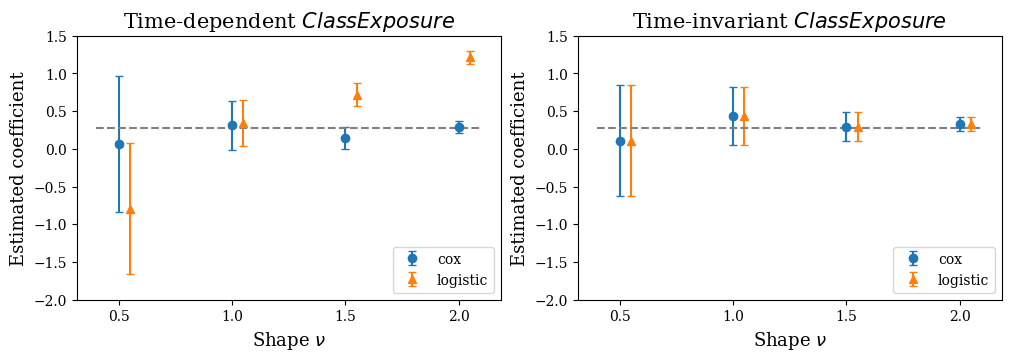

In [176]:
plt.rcParams["font.family"] = 'serif'
fig, axs = plt.subplots(1,2,figsize=(10,3.5),constrained_layout=True)

title_mappings = {
    "aggregate": "Time-invariant",
    "byday": "Time-dependent"
}


for i, sampling in enumerate(["byday", "aggregate"]):

    df_ = pd.DataFrame(cox_stats[sampling])
    axs[i].errorbar(
        df_["shape"], df_["coef_mean"], yerr=1.96*df_["coef_sem"],fmt="o", capsize=3, label="cox"
    )

    df_ = pd.DataFrame(logit_stats[sampling])
    axs[i].errorbar(
        df_["shape"] + 0.05, df_["coef_mean"], yerr=1.96*df_["coef_sem"],fmt="^", capsize=3, label="logistic"
    )

    axs[i].hlines(0.27, 0.4, 2.1, colors="grey", linestyles="dashed")

    axs[i].set_xticks([0.5, 1.0, 1.5, 2.0])
    axs[i].set_title(title_mappings[sampling] + " $\it{ClassExposure}$", fontsize=15)
    axs[i].legend(loc="lower right")
    axs[i].set_xlabel("Shape ${\\nu}$", fontsize=13)
    axs[i].set_ylabel("Estimated coefficient", fontsize=13)
    axs[i].set_ylim(-2.0, 1.5)

plt.savefig("../plots/simulation.pdf")

In [ ]:
logit_res

defaultdict(list,
            {0.5: [{'coef': -2.336672396678648,
               'p-value': 0.33539335801105863,
               'coverage': True}],
             1.0: [{'coef': -0.1432608568509429,
               'p-value': 0.9004385394485179,
               'coverage': True}],
             1.5: [{'coef': 0.2078305020593834,
               'p-value': 0.7478800210776722,
               'coverage': True}],
             2: [{'coef': 0.35564616816661865,
               'p-value': 0.2997295991772331,
               'coverage': True}]})

In [70]:
df_ = pd.DataFrame(loaded_logit_res["aggregate"][0.5])
df_["bias"] = df_["coef"] - 0.27
df_["bias_sq"] = df_["bias"]**2


In [73]:
df_agg = df_.aggregate(["mean","std","sem"])
df_agg

,coef,p-value,coverage,bias,bias_sq
mean,-0.572790,0.512953,1.0,-0.842790,7.114084
std,2.582753,0.333330,0.0,2.582753,8.247334
sem,0.516551,0.066666,0.0,0.516551,1.649467


In [149]:
def hazard(shape, scale=0.001):
    x = np.arange(1,15)
    y = scale * shape * x**(shape-1)
    return y

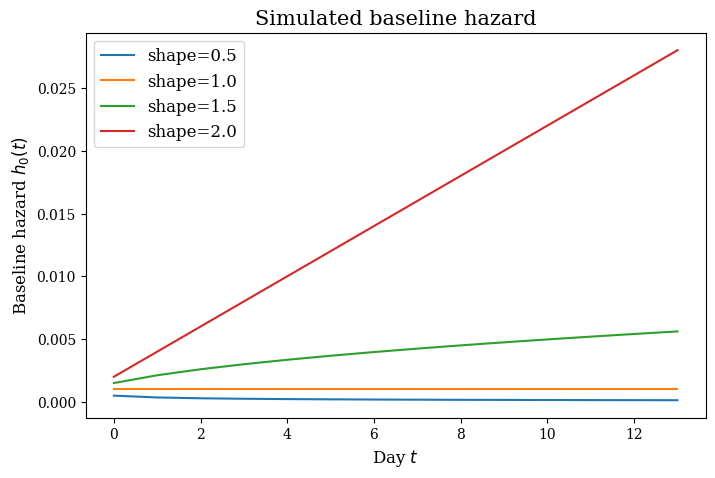

In [189]:
plt.figure(figsize=(8,5))

for shape in [0.5, 1.0, 1.5, 2.0]:
    plt.plot(hazard(shape), label="shape="+str(shape))

# plt.yscale("log")
plt.xlabel("Day $t$", fontsize=12)
plt.ylabel("Baseline hazard $h_0(t)$", fontsize=12)
plt.legend(fontsize=12)
plt.title("Simulated baseline hazard", fontsize=15)

plt.savefig("../plots/simulated_baseline_hazard.pdf")